In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target
y = y.astype(int)
print(f"Data Shape: {X.shape}, Labels Shape: {y.shape}")


Data Shape: (70000, 784), Labels Shape: (70000,)


In [2]:
print(X.describe())

label_counts = y.value_counts()
print(label_counts)


        pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      

<ipython-input-3-323ab5249042>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


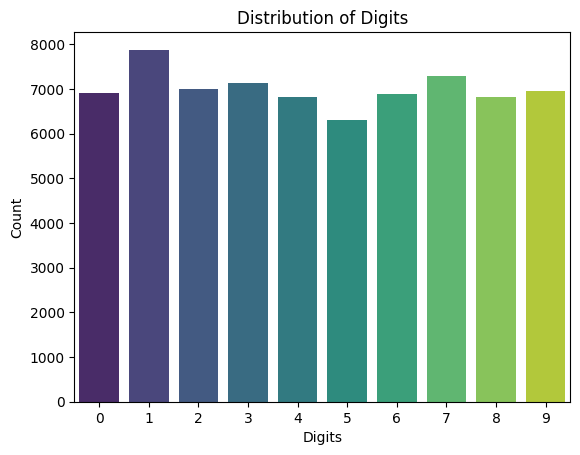

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Digits")
plt.xlabel("Digits")
plt.ylabel("Count")
plt.show()


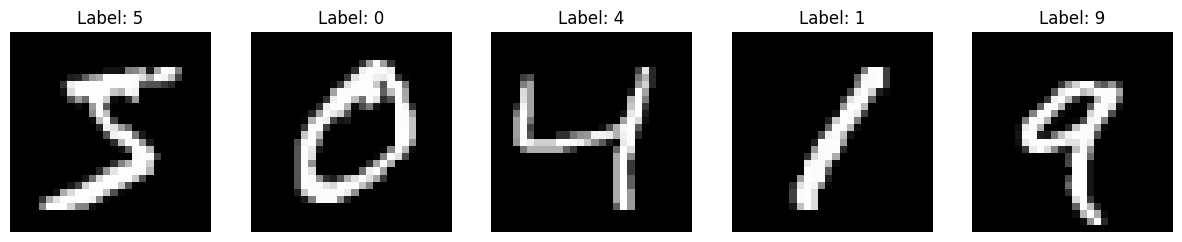

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y.iloc[i]}")
    ax.axis('off')
plt.show()


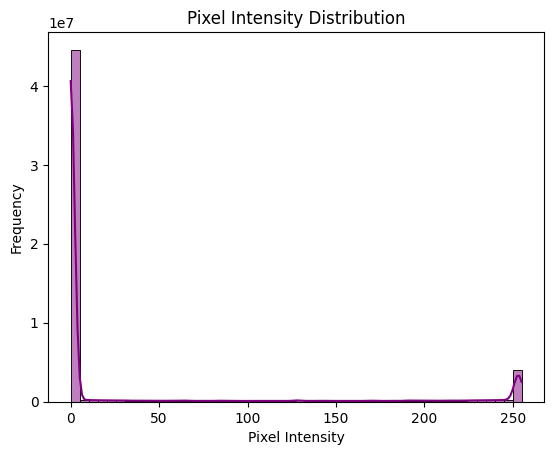

In [5]:
sns.histplot(X.values.flatten(), bins=50, kde=True, color='purple')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


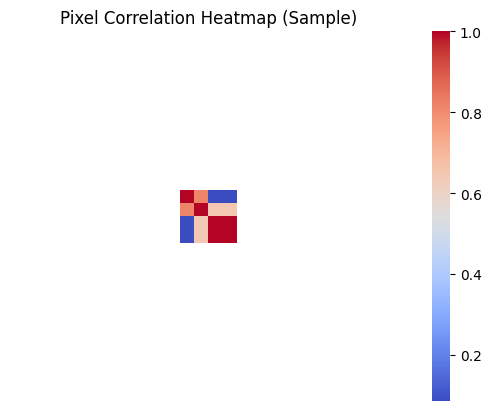

In [6]:
correlation_matrix = X.corr().iloc[:28, :28]
sns.heatmap(correlation_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title("Pixel Correlation Heatmap (Sample)")
plt.show()


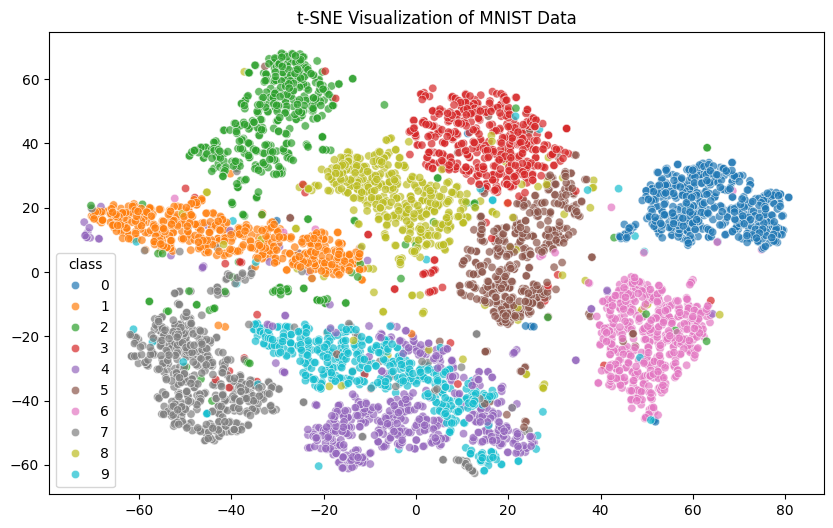

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_2D = tsne.fit_transform(X.iloc[:5000])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=y[:5000], palette="tab10", alpha=0.7)
plt.title("t-SNE Visualization of MNIST Data")
plt.show()


In [8]:
missing_values = X.isnull().sum().sum()
print(f"Missing values: {missing_values}")


Missing values: 0


In [9]:
X_scaled = X / 255.0
print(X_scaled.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

In [10]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)
print(y_encoded[:5])


[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Training set size: 56000, Test set size: 14000


In [15]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

print(f"Reshaped X_train shape: {X_train_reshaped.shape}, X_test shape: {X_test_reshaped.shape}")


Reshaped X_train shape: (56000, 28, 28, 1), X_test shape: (14000, 28, 28, 1)


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train.argmax(axis=1))

svm_predictions = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test.argmax(axis=1), svm_predictions)
classification_report_svm = classification_report(y_test.argmax(axis=1), svm_predictions)

print(f"SVM Model Accuracy: {accuracy_svm:.4f}")
print(f"SVM Classification Report:\n{classification_report_svm}")


SVM Model Accuracy: 0.9351
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.96      0.98      0.97      1600
           2       0.91      0.92      0.92      1380
           3       0.91      0.92      0.92      1433
           4       0.93      0.94      0.94      1295
           5       0.90      0.90      0.90      1273
           6       0.97      0.95      0.96      1396
           7       0.95      0.95      0.95      1503
           8       0.92      0.88      0.90      1357
           9       0.93      0.91      0.92      1420

    accuracy                           0.94     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.94      0.94      0.94     14000



In [18]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test))

nn_predictions = model.predict(X_test_reshaped)
nn_predictions = np.argmax(nn_predictions, axis=1)

accuracy_nn = accuracy_score(y_test.argmax(axis=1), nn_predictions)
classification_report_nn = classification_report(y_test.argmax(axis=1), nn_predictions)

print(f"NN Model Accuracy: {accuracy_nn:.4f}")
print(f"NN Classification Report:\n{classification_report_nn}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 65s 36ms/step - accuracy: 0.9115 - loss: 0.2929 - val_accuracy: 0.9796 - val_loss: 0.0600
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9857 - loss: 0.0439 - val_accuracy: 0.9852 - val_loss: 0.0446
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 96s 44ms/step - accuracy: 0.9912 - loss: 0.0288 - val_accuracy: 0.9851 - val_loss: 0.0468
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 86s 47ms/step - accuracy: 0.9941 - loss: 0.0204 - val_accuracy: 0.9861 - val_loss: 0.0505
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - accuracy: 0.9953 - loss: 0.0150 - val_accuracy: 0.9894 - val_loss: 0.0360
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
NN Model Accuracy: 0.9894
NN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.99      0.99      0.99      1380
           3       0.99      0.99 

Logistic Regression Accuracy: 0.9204
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



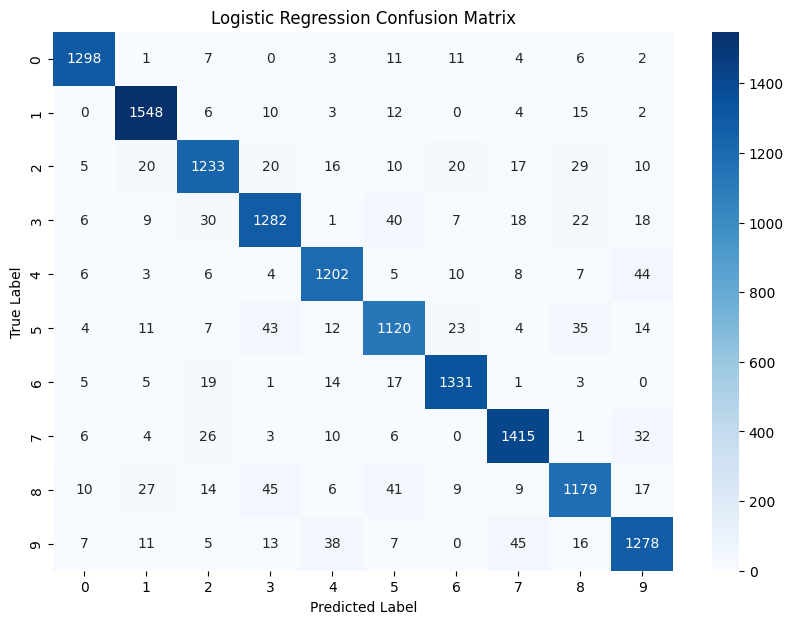

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

log_reg_model = LogisticRegression(max_iter=10000, random_state=42)
log_reg_model.fit(X_train, y_train.argmax(axis=1))

log_reg_predictions = log_reg_model.predict(X_test)

accuracy_log_reg = accuracy_score(y_test.argmax(axis=1), log_reg_predictions)
classification_report_log_reg = classification_report(y_test.argmax(axis=1), log_reg_predictions)

conf_matrix_log_reg = confusion_matrix(y_test.argmax(axis=1), log_reg_predictions)

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Logistic Regression Classification Report:\n{classification_report_log_reg}")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


Random Forest Accuracy: 0.9675
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



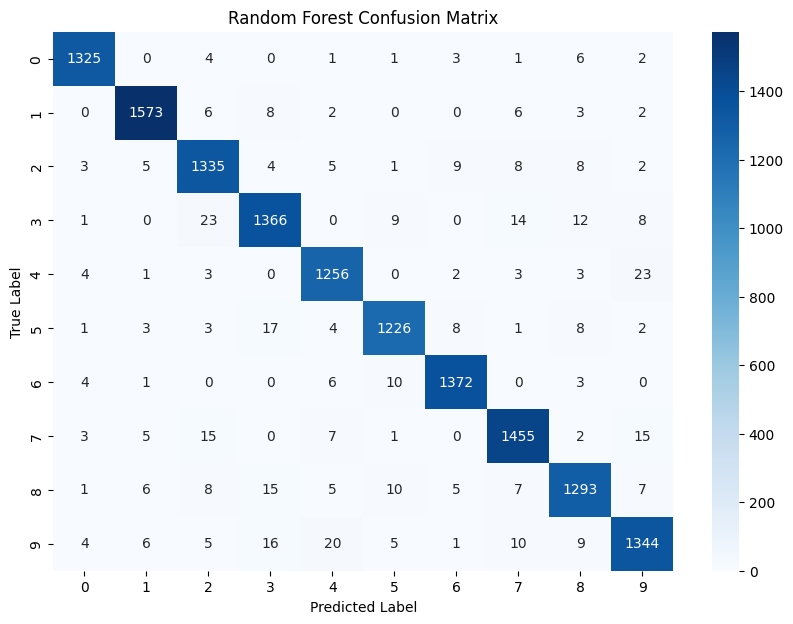

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.argmax(axis=1))

rf_predictions = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test.argmax(axis=1), rf_predictions)
classification_report_rf = classification_report(y_test.argmax(axis=1), rf_predictions)

conf_matrix_rf = confusion_matrix(y_test.argmax(axis=1), rf_predictions)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Classification Report:\n{classification_report_rf}")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()
